In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import time


In [2]:
path = os.getcwd()
df = pd.read_csv(path + "/MDResultsSummary.txt", index_col = "Mixture No.")
Mdf = pd.read_csv(path + "/Mixture Compositions.csv", index_col = "Mixture No.")
Mdfc = Mdf.fillna(0)
CombDF = df.join(Mdfc)
CombDF

,Pc (MPa),Tc (K),Vc (L/mol),Rhoc (mol/L),NumIter,Time (s),Carbon Dioxide,Nitrogen,Methane,Ethane,Propane,iButane,nButane,iPentane,nPentane,nHexane,nHeptane
Mixture No.,,,,,,,,,,,,,,,,,
1,5.317328,299.33914,0.163832,6.103810,7,7.917590,0.0000,0.0000,0.1000,0.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000
2,8.071612,300.71432,0.109287,9.150243,7,6.635211,0.9500,0.0500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000
3,6.351141,441.59488,0.259977,3.846488,20,57.403397,0.0000,0.0000,0.0000,0.4290,0.0000,0.0000,0.3730,0.0000,0.0000,0.00000,0.1980
4,7.558248,390.71973,0.190401,5.252061,20,58.010931,0.0000,0.0000,0.0000,0.7260,0.0000,0.0000,0.1710,0.0000,0.0000,0.00000,0.1030
5,6.268994,405.25943,0.225105,4.442361,20,56.822596,0.0000,0.0000,0.0000,0.5140,0.0000,0.0000,0.4120,0.0000,0.0000,0.00000,0.0740
6,8.382756,395.76570,0.185227,5.398792,21,60.679616,0.0000,0.0000,0.0000,0.8010,0.0000,0.0000,0.0000,0.0640,0.0000,0.00000,0.1350
7,7.063186,423.02360,0.231132,4.326534,20,57.765798,0.0000,0.0000,0.0000,0.6120,0.0000,0.0000,0.0000,0.2710,0.0000,0.00000,0.1170
8,6.924060,416.99683,0.227922,4.387469,20,55.073651,0.0000,0.0000,0.0000,0.6150,0.0000,0.0000,0.0000,0.2960,0.0000,0.00000,0.0890
9,9.135976,323.33612,0.145681,6.864309,20,54.941760,0.0000,0.0465,0.4530,0.0000,0.5005,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000


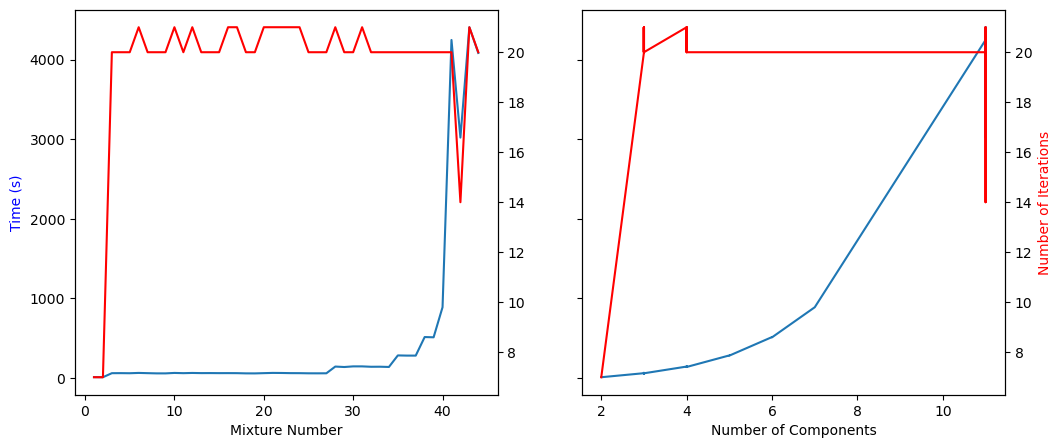

In [3]:
fig, ax = plt.subplots(1, 2, figsize = [12, 5], sharey = True)
ax[0].plot(df["Time (s)"])
ax01 = ax[0].twinx()
ax01.plot(df["NumIter"], 'r')
ax[0].set_xlabel("Mixture Number")
ax[0].set_ylabel("Time (s)", color = 'b')

ax[1].plot(Mdf.count(axis=1), df["Time (s)"])
ax11 = ax[1].twinx()
ax11.plot(Mdf.count(axis=1), df["NumIter"], 'r')
ax11.set_ylabel("Number of Iterations", color = 'r')
ax[1].set_xlabel("Number of Components");

In [4]:
Cdf = pd.read_csv(path + "/Chemical Critical Properties.csv")

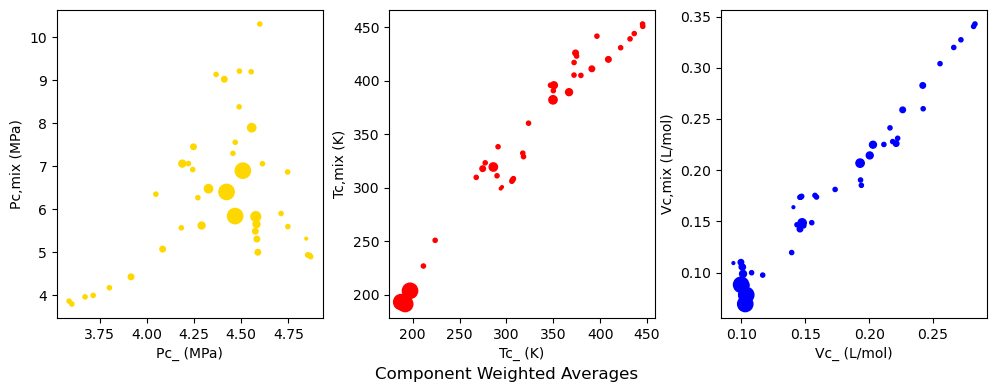

In [5]:
Pcwa = np.zeros(np.shape(Mdf)[0])
Tcwa = np.zeros(np.shape(Mdf)[0])
Vcwa = np.zeros(np.shape(Mdf)[0])
for ind, row in Mdfc.iterrows():
    Pcwa[ind-1] = np.dot(row, Cdf["Pc (MPa)"])
    Tcwa[ind-1] = np.dot(row, Cdf["Tc (K)"])
    Vcwa[ind-1] = np.dot(row, Cdf["Vc (l/mol)"])
    
fig, ax = plt.subplots(1, 3, figsize = [12, 4])
plt.subplots_adjust(wspace = 0.25)
ax[0].scatter(np.concatenate([Pcwa[0:1], Pcwa[2:]]), df.loc[df.index != 2, :]["Pc (MPa)"], Mdf.loc[Mdf.index != 2, :].count(axis=1)**2, c = 'gold')
#ax[0].scatter(Pcwa, df["Pc (MPa)"], Mdf.count(axis=1)**2, c = 'gold')
ax[0].set_ylabel("Pc,mix (MPa)")
ax[0].set_xlabel("Pc_ (MPa)")
ax[1].scatter(Tcwa, df["Tc (K)"], Mdf.count(axis=1)**2, c = 'r')
ax[1].set_ylabel("Tc,mix (K)")
ax[1].set_xlabel("Tc_ (K)")
ax[2].scatter(Vcwa, df["Vc (L/mol)"], Mdf.count(axis=1)**2, c = 'b')
ax[2].set_ylabel("Vc,mix (L/mol)")
ax[2].set_xlabel("Vc_ (L/mol)")
plt.suptitle("Component Weighted Averages", y = -0.05, va = "bottom");

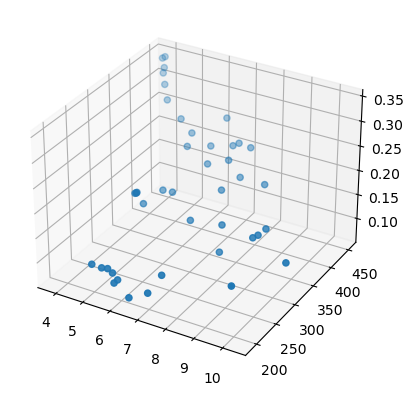

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df["Pc (MPa)"], df["Tc (K)"],  df["Vc (L/mol)"])